#                             Telecome customer churn prediction

### The objective of this project is to analyze customer demographics, services, tenure, and other variables to predict the likelihood of customer churn.

### 1. Importing required libraries

In [102]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# reading data

df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding the  dataset

In [3]:
# shape of dataset

print('Number of rows : ',df.shape[0])
print('Number of columns : ',df.shape[1])


Number of rows :  7043
Number of columns :  21


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# Checking if there is any null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values in the dataset

In [8]:
# Checking if there is any null values

df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### No duplicated values in the dataset

In [10]:
# No. of unique values in the dataset

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
# Unique values of every column

for i in df.columns:
    print("Unique values of ",i,': ',df[i].unique(),'\n')

Unique values of  customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

Unique values of  gender :  ['Female' 'Male'] 

Unique values of  SeniorCitizen :  [0 1] 

Unique values of  Partner :  ['Yes' 'No'] 

Unique values of  Dependents :  ['No' 'Yes'] 

Unique values of  tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

Unique values of  PhoneService :  ['No' 'Yes'] 

Unique values of  MultipleLines :  ['No phone service' 'No' 'Yes'] 

Unique values of  InternetService :  ['DSL' 'Fiber optic' 'No'] 

Unique values of  OnlineSecurity :  ['No' 'Yes' 'No internet service'] 

Unique values of  OnlineBackup :  ['Yes' 'No' 'No internet service'] 

Unique values of  DeviceProtection :  ['No' 'Yes' 'No internet service'] 

Unique values of  TechSupport :  ['No' 'Ye

### Data analysis through some visualiazations

<Axes: ylabel='count'>

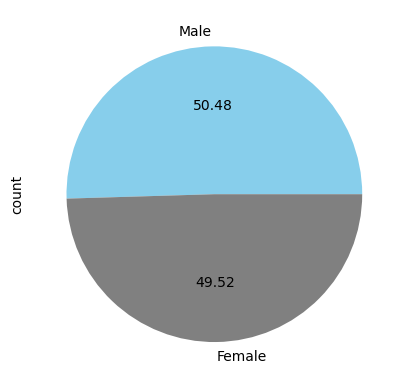

In [12]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.2f',colors=['skyblue','gray'])

#### number of male and female customers are almost equal.

In [13]:
# sns.countplot(x='Churn',data=df,hue='gender')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

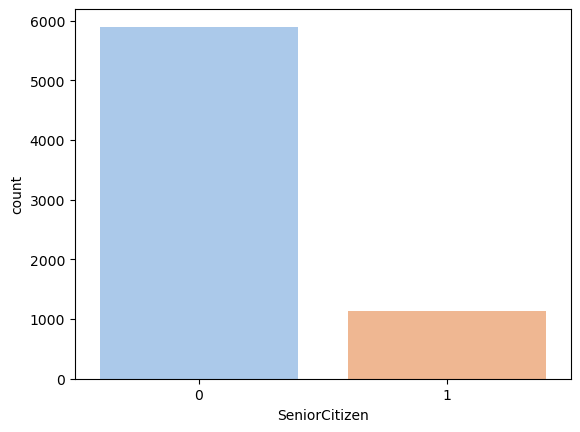

In [14]:
sns.countplot(data=df,x='SeniorCitizen',palette='pastel')

#### The majority of customers are not senior citizens.

<Axes: xlabel='Contract', ylabel='count'>

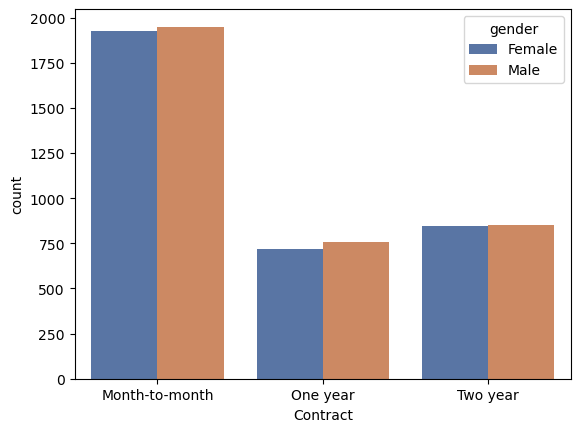

In [15]:
sns.countplot(data=df,x='Contract',hue='gender',palette='deep')

#### The majority of customers opt for a month-to-month contract.

Text(0.5, 1.0, 'Distribution Of MonthlyCharges')

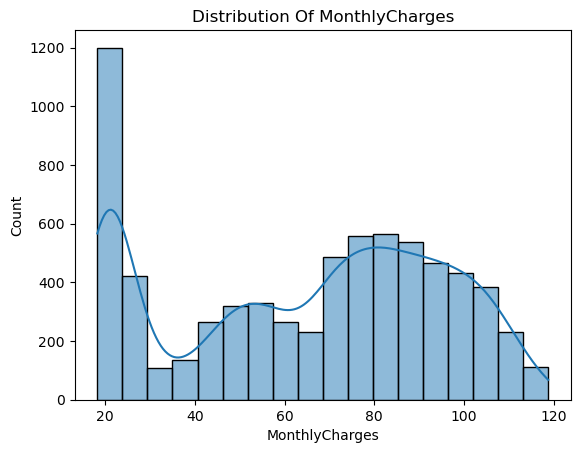

In [16]:
sns.histplot(data=df,x=df['MonthlyCharges'],kde=True)
plt.title('Distribution Of MonthlyCharges')

In [17]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [18]:
# sns.scatterplot(x='MonthlyCharges', y='tenure', data=df, style='MonthlyCharges')


Text(0.5, 1.0, 'Distribution Of tenure')

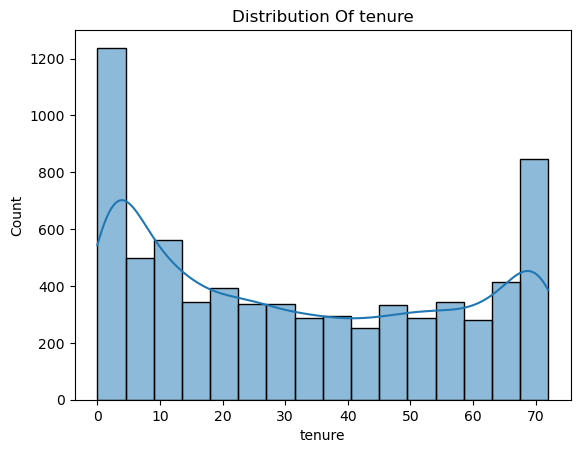

In [19]:
sns.histplot(data=df,x=df['tenure'],kde=True)
plt.title('Distribution Of tenure')

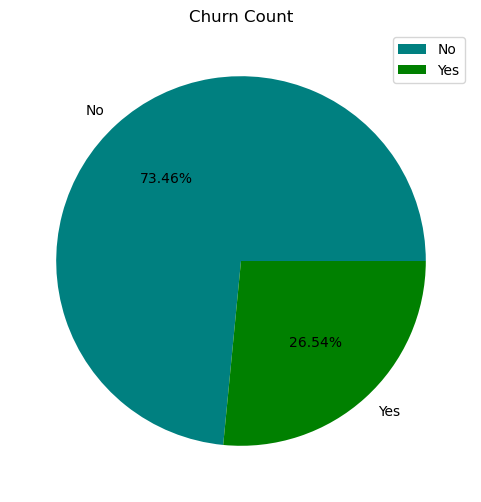

In [112]:
plt.figure(figsize=(14,6))
color=['teal','green']
plt.pie(x= df['Churn'].value_counts(),labels= df['Churn'].unique(),colors=color,autopct='%1.2f%%')
plt.title('Churn Count')
plt.legend()

## Customer Demographics and Churn

Text(0.5, 1.0, 'Dependents And Churn')

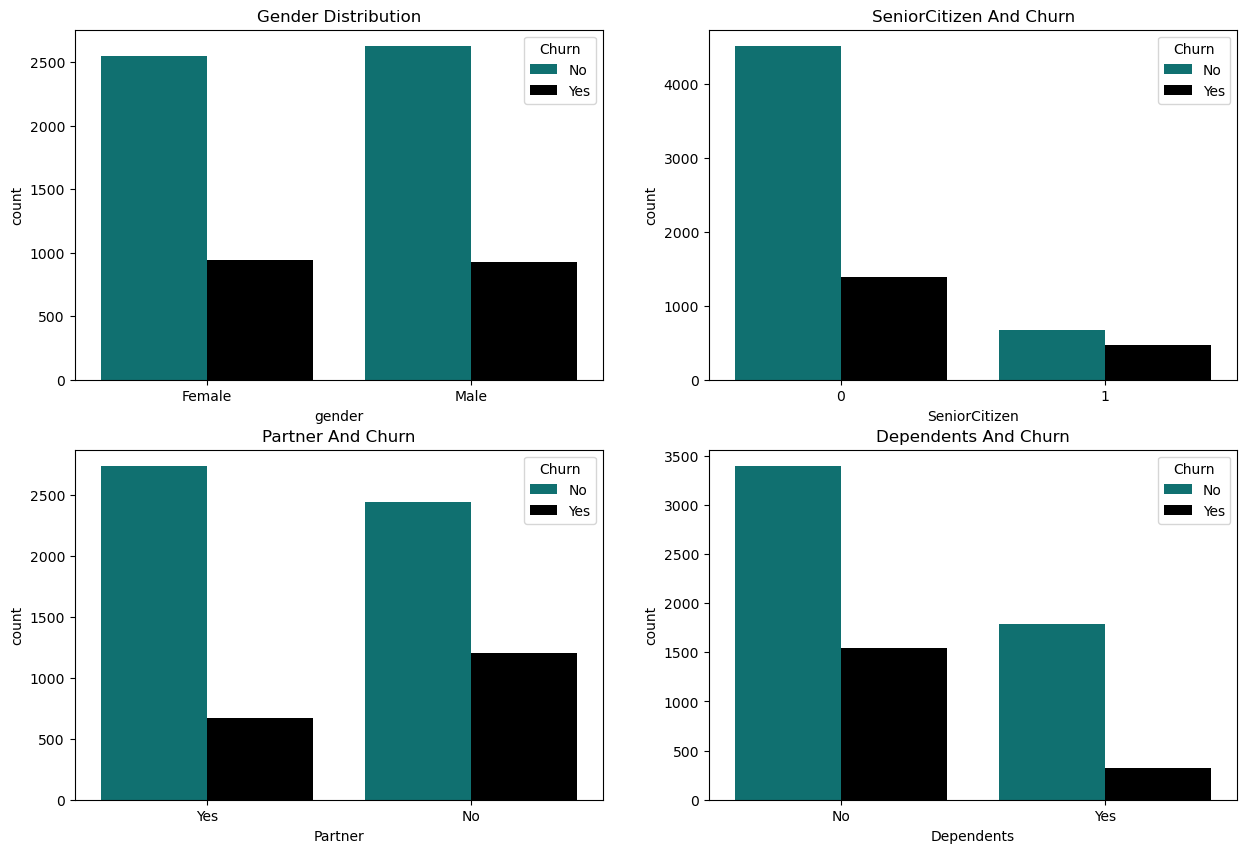

In [113]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
#gender distribution
color=['teal','black']
sns.countplot(x='gender',data=df,hue='Churn',palette=color,ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')
#senior citizen distriburion
sns.countplot(x='SeniorCitizen',data=df,hue='Churn',palette=color,ax=ax[0,1])
ax[0,1].set_title('SeniorCitizen And Churn')
#partner distribution
sns.countplot(x='Partner',data=df,hue='Churn',palette=color,ax=ax[1,0])
ax[1,0].set_title('Partner And Churn')
#Dependents distribution
sns.countplot(x='Dependents',data=df,hue='Churn',palette=color,ax=ax[1,1])
ax[1,1].set_title('Dependents And Churn')

from above graph it is clear that male and female have same churn count.However, the senior citizens
have a lesser churn count as compared to non senior citizens,The customers with no partners have
higher churn count as compared to customers with partners. customers with no dependents have
higher churn count as compared to customers with dependents

### CUSTOMER SERVICES AND CHURN

Text(0.5, 1.0, 'StreamingMovies')

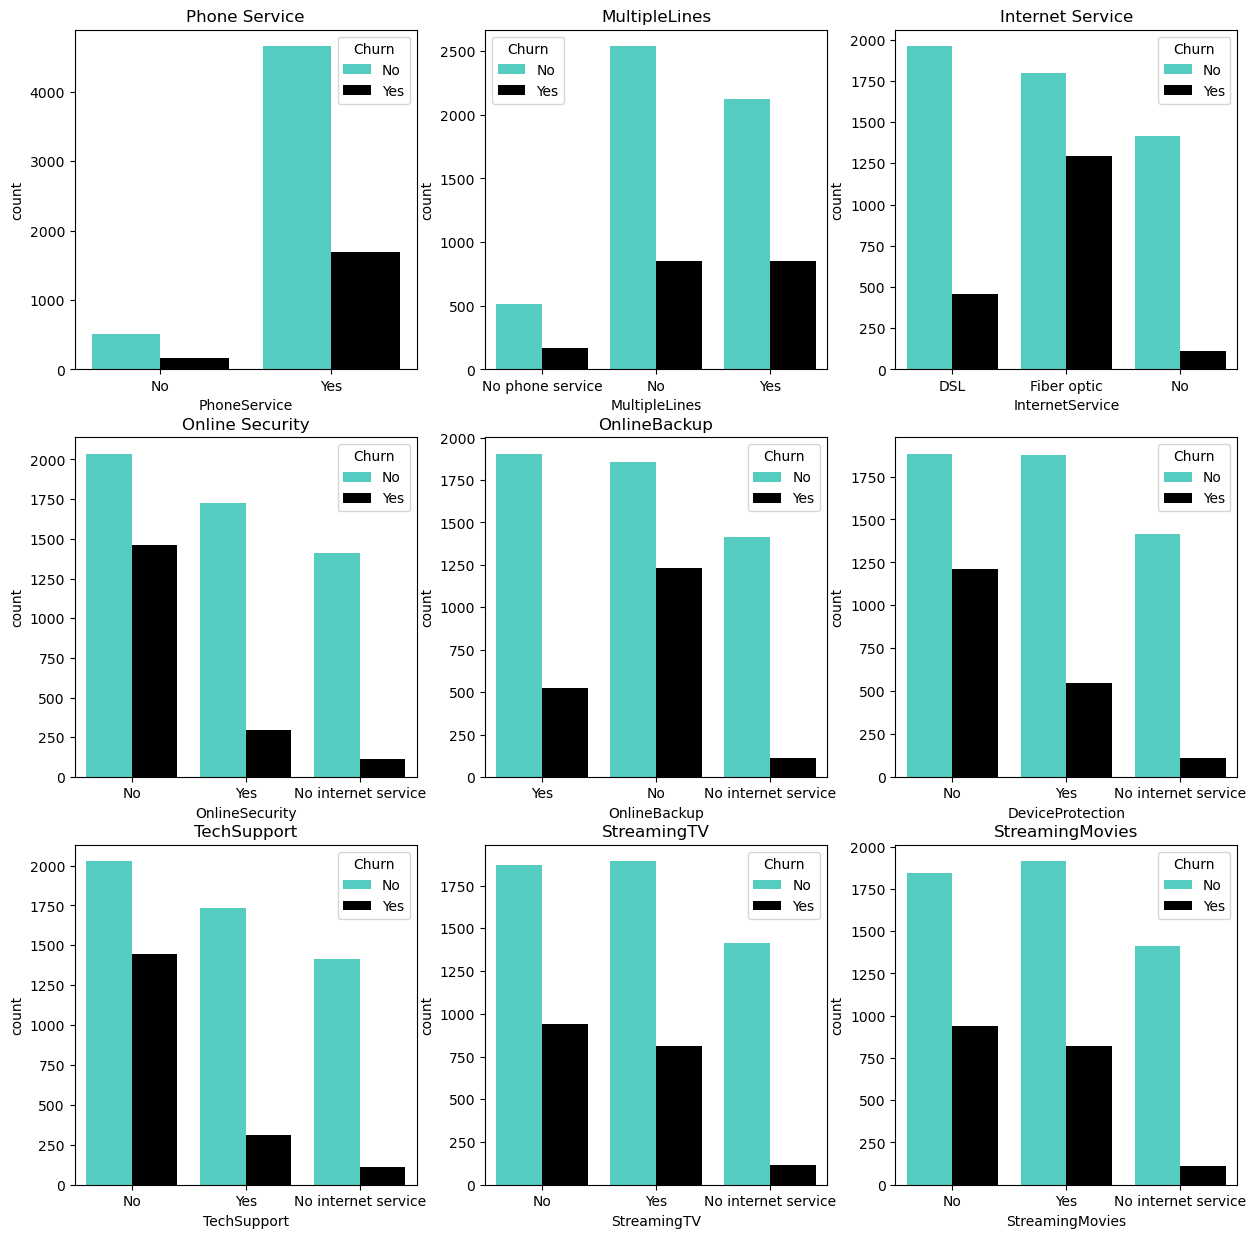

In [123]:
 fig,ax=plt.subplots(3,3,figsize=(15,15))
color=['turquoise','black']
#phone service
sns.countplot(x='PhoneService',data=df,hue='Churn',palette=color,ax=ax[0,0])
ax[0,0].set_title('Phone Service')
#multiplelines
sns.countplot(x='MultipleLines',data=df,hue='Churn',palette=color,ax=ax[0,1])
ax[0,1].set_title('MultipleLines')
#internet service
sns.countplot(x='InternetService',data=df,hue='Churn',palette=color,ax=ax[0,2])
ax[0,2].set_title('Internet Service')
#online security service
sns.countplot(x='OnlineSecurity',data=df,hue='Churn',palette=color,ax=ax[1,0])
ax[1,0].set_title('Online Security')
#online backup
sns.countplot(x='OnlineBackup',data=df,hue='Churn',palette=color,ax=ax[1,1])
ax[1,1].set_title('OnlineBackup')
#Device protection
sns.countplot(x='DeviceProtection',data=df,hue='Churn',palette=color,ax=ax[1,2])
ax[2,0].set_title('Device protection')
#tech support
sns.countplot(x='TechSupport',data=df,hue='Churn',palette=color,ax=ax[2,0])
ax[2,0].set_title('TechSupport')
#streaming TV
sns.countplot(x='StreamingTV',data=df,hue='Churn',palette=color,ax=ax[2,1])
ax[2,1].set_title('StreamingTV')
#Streaming Movies
sns.countplot(x='StreamingMovies',data=df,hue='Churn',palette=color,ax=ax[2,2])
ax[2,2].set_title('StreamingMovies')

These graphs visualizes the relation between customer churn based on services opted by the customer. churn count is higher for the customers, who have taken multiple lines. the customers with
streaming services have lower churn count

### TENURE/CONTRACT AND CHURN

Text(0.5, 1.0, 'Contract Type and Churn')

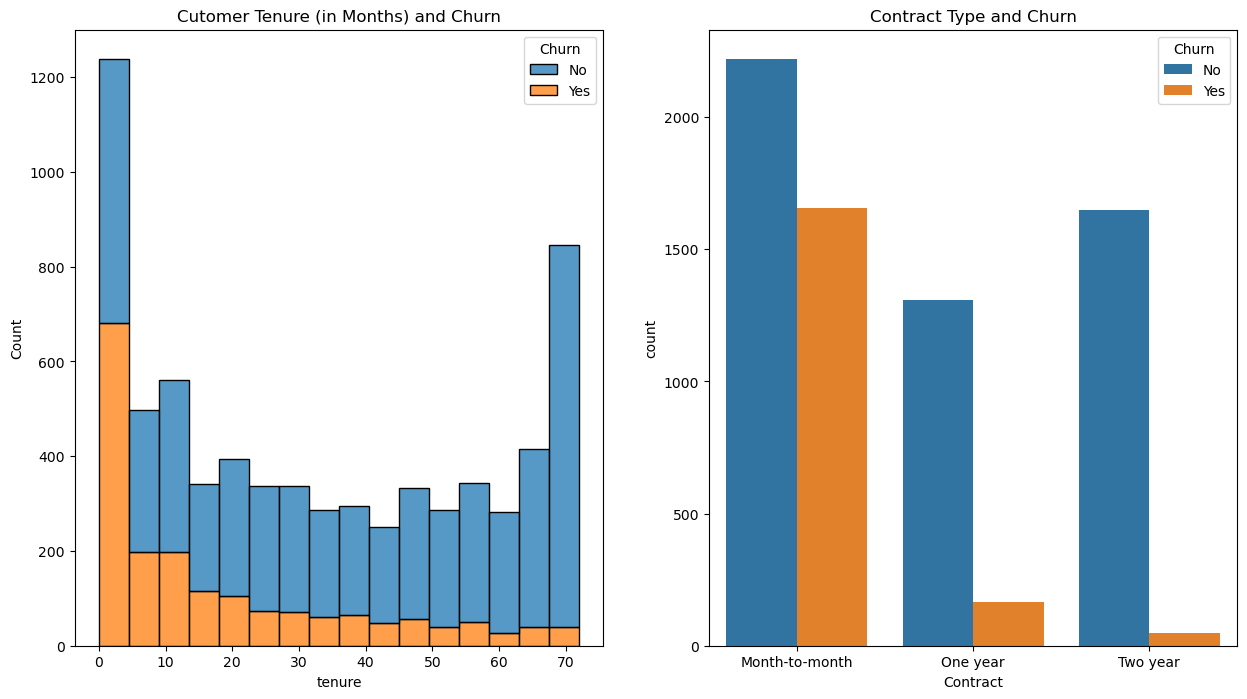

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple ='stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')


customer with long tenure have lowest churn rate,and cutsomer with month to month contract have
highest churn count than one or more year contract


Customer with higher monthly charges have higher churn count,But customer with highest Total
charges have the lower churn count.This could be possible when the customer has a long tenure and
use lot of services.Therefore the company sholud focus on lowering the monthly charges inorder to
reduce churn count

In [118]:
# Mean of monthly charges for churned and retained customers
mean_monthly_charges_churned = df[df['Churn']== 'Yes']['MonthlyCharges'].mean()
mean_monthly_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"Mean Monthly Charges for Churned Customers:{mean_monthly_charges_churned:.2f}")
print(f"Mean Monthly Charges for Retained Customers:{mean_monthly_charges_retained:.2f}")

Mean Monthly Charges for Churned Customers:74.44
Mean Monthly Charges for Retained Customers:61.27


Text(0.5, 1.0, 'Payment method by Churn')

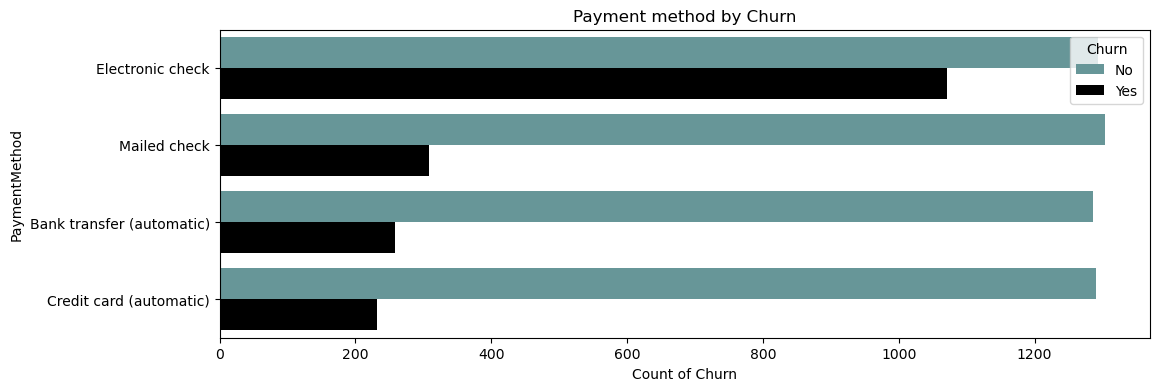

In [120]:
# Payment method by customer churn
plt.figure(figsize=(12,4))
color=['cadetblue','black']
sns.countplot(data=df, y = 'PaymentMethod', hue = 'Churn',palette=color)
plt.xlabel('Count of Churn')
plt.title('Payment method by Churn')

Most of churn customers using electronic check for payment.

In [22]:
df1=df.copy()

In [23]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')


In [24]:
# converting yes and no to 1 and 0 respectively

df1['Partner']=df1['Partner'].map({'Yes':1,'No':0})
df1['Dependents']=df1['Dependents'].map({'Yes':1,'No':0})
df1['PhoneService']=df1['PhoneService'].map({'Yes':1,'No':0})
df1['PaperlessBilling']=df1['PaperlessBilling'].map({'Yes':1,'No':0})
df1['Churn']=df1['Churn'].map({'Yes':1,'No':0})


# converting gender : female and male to 0 and 1 respectively

df1['gender']=df1['gender'].map({'Female':1,'Male':0})


In [25]:
# drop customerID

df1=df1.drop('customerID',axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [26]:
# df2=pd.get_dummies(df1)
# df2.head()

from sklearn.preprocessing import LabelEncoder
#colums for label encoding
cols = df1.columns[df1.dtypes == 'object']
#Label encoder object
le = LabelEncoder()
#Label encoding the columns
for i in cols:
    le.fit(df1[i])
    df1[i] =le.transform(df1[i])
    print(i, df1[i].unique(), '\n')

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaymentMethod [2 3 0 1] 



In [27]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,1,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,0,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [28]:
## spltinng df2 dataset into features and target variables

x=df1.drop(columns='Churn',axis=1)
y=df1['Churn']
x


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,1,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,1,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,0,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [29]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Feature scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[1.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [0.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [0.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [0.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

## Splitting data into train and test set

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [33]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill in missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train and transform both x_train and x_test
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


# Building models

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV


## 1.Logistic regression 

accuracy :  0.8106956933270232
best_params :  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
best_model :  LogisticRegression(C=100, penalty='l1', solver='saga')
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



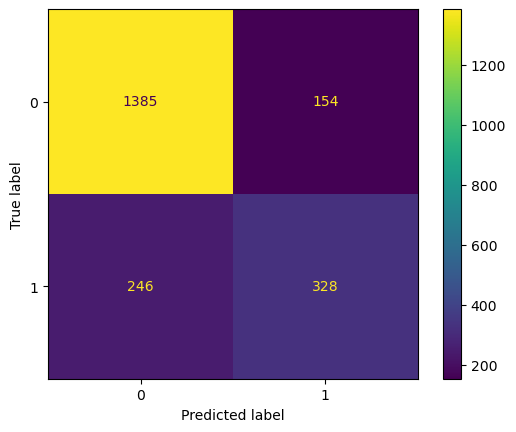

In [47]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()


param_grid = {
    'penalty': ['l1', 'l2'],       # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(model_log, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('accuracy : ',accuracy)
print('best_params : ',best_params)
print('best_model : ',best_model)
print(classification_report(y_test,y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


## 2.Naive Bayes

accuracy :  0.8106956933270232
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



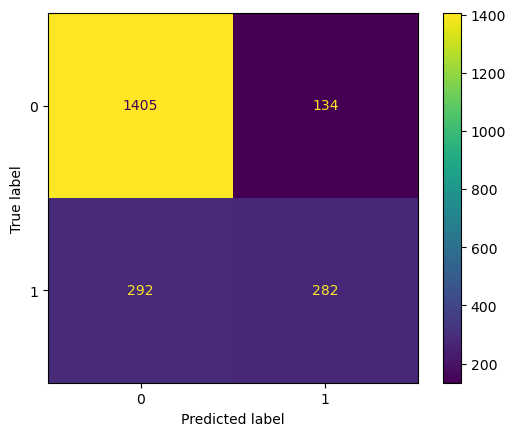

In [84]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_nb = best_model.predict(x_test)

accuracy_NB = accuracy_score(y_test, y_pred)
print('accuracy : ',accuracy)
print(classification_report(y_test,y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


## 3.DecisionTreeClassifier

accuracy_tree :  0.7733080927591103
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1539
           1       0.59      0.54      0.56       574

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.77      0.77      0.77      2113



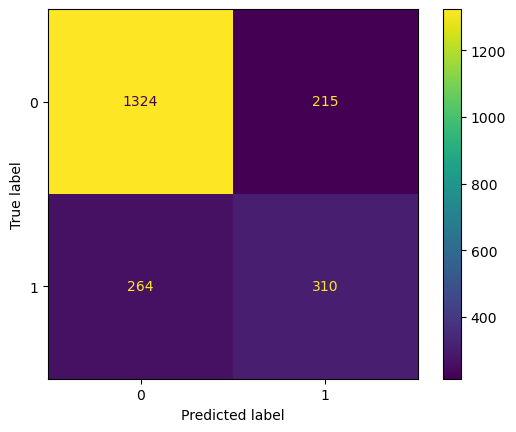

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create a GridSearchCV object
grid_search_tree = GridSearchCV(model_tree, param_grid, scoring='accuracy', cv=5)
grid_search_tree.fit(x_train, y_train)

best_model_tree = grid_search_tree.best_estimator_
best_params_tree = grid_search_tree.best_params_
# print('best_model_tree = ', grid_search_tree.best_estimator_)
# print('best_params_tree = ', grid_search_tree.best_params_)

y_pred_tree = best_model_tree.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print('accuracy_tree : ',accuracy_tree)
print(classification_report(y_test,y_pred_tree))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree))


## 4.RandomForestClassifier

{'max_depth': 10, 'n_estimators': 50}
accuracy_tree :  0.7733080927591103
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



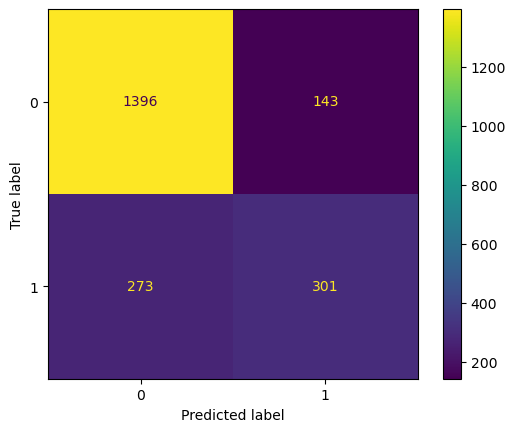

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()

param_rf = {'n_estimators': [50, 100, 150],'max_depth': [ 10, 20, 30,40,50]}
grid_search_rf = GridSearchCV(model_rfc, param_rf, scoring ='accuracy', cv=10)
grid_search_rf.fit(x_train, y_train)
print(grid_search_rf.best_params_)
# best_model_tree = grid_search_tree.best_estimator_



y_pred_rfc=grid_search_rf.predict(x_test)
accuracy_rfc=accuracy_score(y_test,y_pred_rfc)

print('accuracy_tree : ',accuracy_tree)
print(classification_report(y_test,y_pred_rfc))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))


## 5.AdaBoostClassifier

Accuracy:  0.8035967818267865
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.60       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



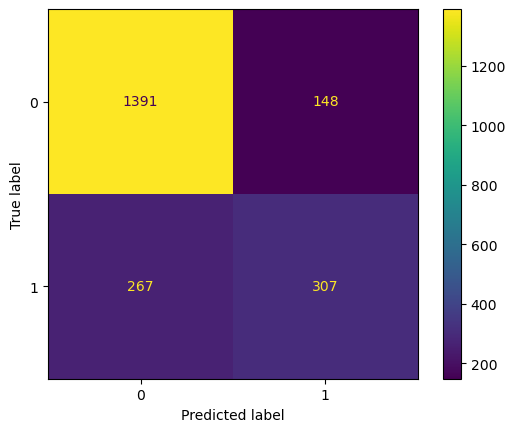

In [54]:
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],   # The number of weak classifiers
    'learning_rate': [0.1, 0.5, 1.0]  # The learning rate
}
    
grid_search_ada = GridSearchCV(model_abc, param_grid, scoring='accuracy', cv=5)
grid_search_ada.fit(x_train, y_train)

best_model_ada = grid_search_ada.best_estimator_
best_params_ada = grid_search_ada.best_params_

y_pred_ada = best_model_ada.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('Accuracy: ', accuracy_ada)
    
print(classification_report(y_test,y_pred_ada))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ada))
   

## 6.GradientBoostingClassifier

Accuracy:  0.7998106956933271
Best Model:  GradientBoostingClassifier(n_estimators=50)
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



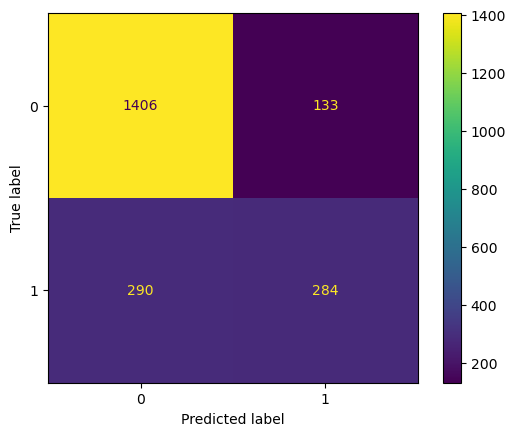

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()

model_gbc = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],    # The number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # The learning rate
    'max_depth': [3, 4, 5],           # Maximum depth of individual trees
}

grid_search_gbc = GridSearchCV(model_gbc, param_grid, scoring='accuracy', cv=5)
grid_search_gbc.fit(x_train, y_train)

# Get the best model and hyperparameters
best_model_gbc = grid_search_gbc.best_estimator_
best_params_gbc = grid_search_gbc.best_params_

# Evaluate the best model on your test data
y_pred_gbc = best_model_gbc.predict(x_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print('Accuracy: ', accuracy_gbc)
print('Best Model: ', best_model_gbc)
print('Best Parameters: ', best_params_gbc)
print(classification_report(y_test, y_pred_gbc))


print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gbc))


## 7.SVC

Accuracy:  0.8097491717936584
Best Model:  SVC(C=0.1, kernel='linear')
Best Parameters:  {'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



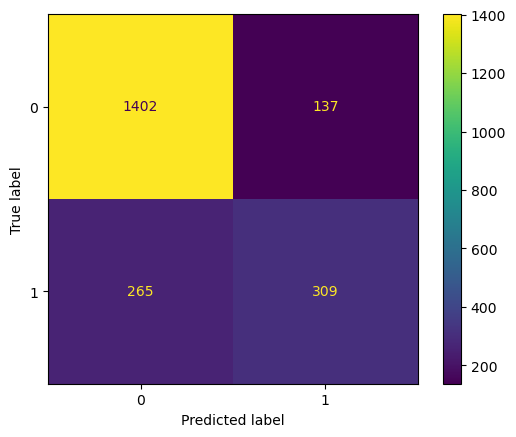

In [57]:
from sklearn.svm import SVC

model_svc = SVC()

param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
}

grid_search_svc = GridSearchCV(model_svc, param_grid, scoring='accuracy', cv=5)

grid_search_svc.fit(x_train, y_train)

best_model_svc = grid_search_svc.best_estimator_
best_params_svc = grid_search_svc.best_params_

# Evaluate the best model on your test data
y_pred_svc = best_model_svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print('Accuracy: ', accuracy_svc)
print('Best Model: ', best_model_svc)
print('Best Parameters: ', best_params_svc)
print(classification_report(y_test, y_pred_svc))

# Display the confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc))


## 8.XGBClassifier

Accuracy:  0.7983909133932797
Best Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       

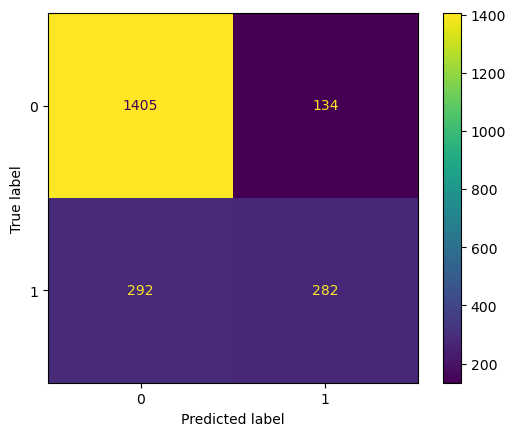

In [59]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # The number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # The learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(model_xgb, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to your training data
grid_search_xgb.fit(x_train, y_train)

# Get the best model and hyperparameters
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

# Evaluate the best model on your test data
y_pred_xgb = best_model_xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy: ', accuracy_xgb)
print('Best Model: ', best_model_xgb)
print('Best Parameters: ', best_params_xgb)
print(classification_report(y_test, y_pred_xgb))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb))




## Accuracy score comaprison between models

In [85]:
model=['Logistic','Naive_bayes','DECISION_TREE','RANDOM_FOREST','Adaboost','Gradientboost','SVC','XGboost']
accuracy_scores=[accuracy_log,accuracy_NB,accuracy_tree,accuracy_rfc,accuracy_ada,accuracy_gbc,accuracy_svc,accuracy_xgb]
accuracy_scores

[0.8106956933270232,
 0.7983909133932797,
 0.7733080927591103,
 0.8031235210601041,
 0.8035967818267865,
 0.7998106956933271,
 0.8097491717936584,
 0.7983909133932797]

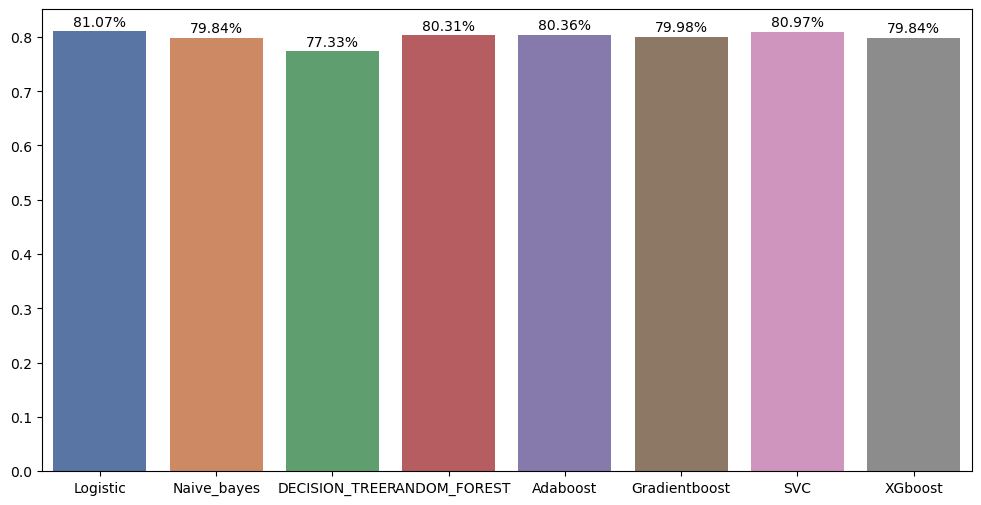

In [86]:
plt.figure(figsize=(12,6))

sns.barplot(x=model,y=accuracy_scores,palette='deep')
for i, score in enumerate(accuracy_scores):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')

C:\Users\smm\AppData\Local\Temp\ipykernel_1440\2319509923.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0,0]).set_title('Logistic')
C:\Users\smm\AppData\Local\Temp\ipykernel_1440\2319509923.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

C:\Users\smm\AppData\Local\Temp\ipykernel_1440\2319509923.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_xgb, hist=False, color="b", label="Fitted Values" ,ax=ax[3,1])


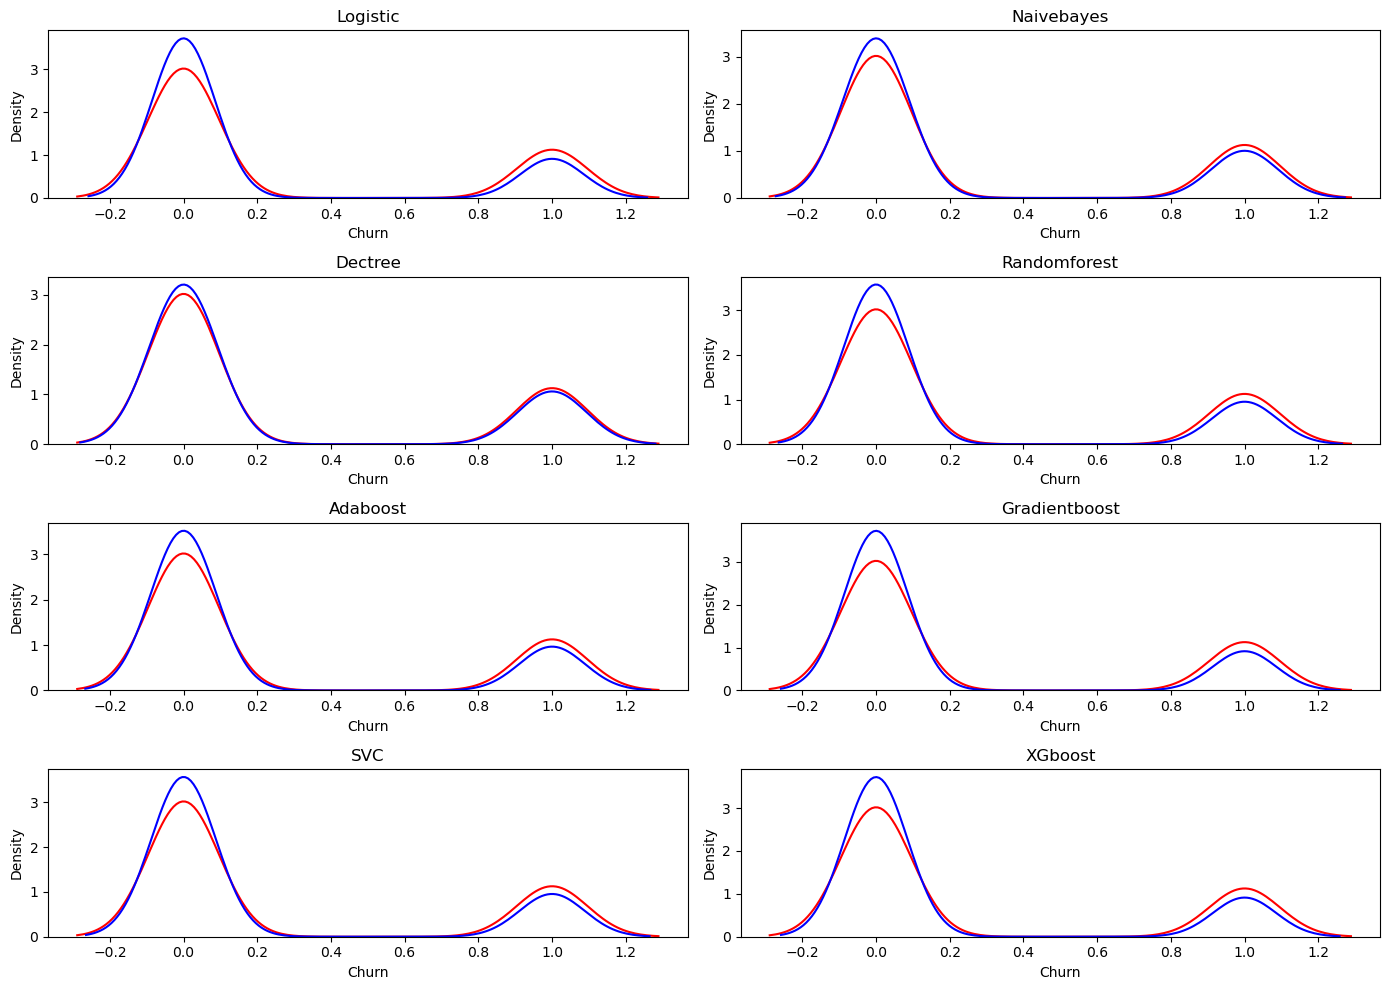

In [104]:
fig, ax = plt.subplots(4, 2, figsize=(14, 10))

import warnings

# Temporarily suppress warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0,0]).set_title('Logistic')
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" ,ax=ax[0,0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0,1]).set_title('Naivebayes')
sns.distplot(y_pred_nb, hist=False, color="b", label="Fitted Values" ,ax=ax[0,1])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1,0]).set_title('Dectree')
sns.distplot(y_pred_tree, hist=False, color="b", label="Fitted Values" ,ax=ax[1,0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1,1]).set_title('Randomforest')
sns.distplot(y_pred_rfc, hist=False, color="b", label="Fitted Values" ,ax=ax[1,1])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2,0]).set_title('Adaboost')
sns.distplot(y_pred_ada, hist=False, color="b", label="Fitted Values" ,ax=ax[2,0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2,1]).set_title('Gradientboost')
sns.distplot(y_pred_gbc, hist=False, color="b", label="Fitted Values" ,ax=ax[2,1])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[3,0]).set_title('SVC')
sns.distplot(y_pred_svc, hist=False, color="b", label="Fitted Values" ,ax=ax[3,0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[3,1]).set_title('XGboost')
sns.distplot(y_pred_xgb, hist=False, color="b", label="Fitted Values" ,ax=ax[3,1])

plt.tight_layout()
plt.show()

Among the various machine learning models I experimented with, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, Adaboost, Gradient Boosting, Support Vector Classifier (SVC), and XGBoost, the Logistic Regression model stands out with the highest accuracy and F1-score. This suggests that, for the given dataset and problem, Logistic Regression performs exceptionally well, making it a strong candidate for this particular task.

##  observations and insights

### Customer Churn Correlations:

 * Month-to-month contracts, absence of online security, and no tech support are positively correlated with customer churn.
 * Conversely, longer tenures and two-year contracts are negatively correlated with customer churn.
 * Services like online security, streaming TV, online backup, and tech support, when bundled without an internet connection,      appear to reduce churn.
 
 
### Demographics:

 * Gender Distribution: The dataset shows an equal distribution of male and female customers.
 * Senior Citizens: Senior citizens make up only 16% of the customer base, indicating a predominantly younger customer             demographic.
 * Partner and Dependent Status: Approximately 50% of customers have a partner, while only 30% have dependents.
 * Notably, among customers with partners, only half have dependents, while the other half do not. Conversely, among customers     without partners, the majority (80%) have no dependents.
 
### Tenure:

 * The tenure distribution varies, with many customers being with the telecom company for only a month, while a significant        number have a tenure of approximately 72 months.
 * Tenure varies based on contract type; customers with longer contracts tend to stay with the company longer.
 * Longer-tenured customers are less likely to churn, whereas those with month-to-month contracts exhibit a high churn rate.
 
### Churn Rate Patterns:

 * Senior citizens have a notably higher churn rate compared to younger customers.
 * A higher percentage of customers churn when monthly charges are high.
 * These insights offer a deeper understanding of the factors and patterns that influence customer churn, enabling data-driven     decision-making for your telecom company.





